# 1. 들어가며 ( 학습목표 )

* 데이터 분석의 꽃은 시각화(visualization)이며 시계열 분석을 직관적으로 이해할 수 있도록 표현할 수 있는 도구입니다.
* 대표적인 시각화 라이브러리는 matplotlib이 있습니다.
* 시각화 연습을 위해 EuStockMarkets 데이터셋을 사용합니다.
* 시계열 데이터 성질을 분석하기 위해 상관도표(Correlogram)을 사용합니다.
* 상관도표(Correlogram)는 대표적으로 ACF(AutoCorrelation Function)와 PACF(Partial AutoCorrelation Function)가 있습니다.
* 상관도표를 활용하여 현재의 시점과 시점의 차이(lag)를 비교 분석할 수 있습니다.

## 학습목표

* 시계열 데이터를 표현할 수 있는 다양한 그래프를 그려봅시다.
* 시계열에 특화된 EDA 방법인 ACF Plot과 PACF Plot에 대해 알아봅시다.

# 2. 시각화를 통한 시계열 데이터 탐색

## 시계열 데이터를 표현할 수 있는 다양한 그래프
* Matplotlib은 Python 및 Numpy를 활용하여 나온 수치 데이터를 시각화할 수 있도록 도와줍니다.
---

1. 시계열 데이터를 표현할 수 있는 다양한 그래프
* Line plot : 간단한 선을 그릴 수 있으며 데이터의 시간과 순서에 따라 어떻게 변하는지 알 수 있습니다.
* Histogram : 변수에 대한 구간별 빈도수를 나타내고 가로축은 변수의 구간, 세로축은 도수를 뜻하며 막대는 서로 겹치지 않는 특징을 가지고 있습니다.
* Scatter plot : 좌표 x, y를 활용하여 x와 y가 만나는 지점을 시각화 하였으며 x, y 두 개 변수 간의 관계를 나타냅니다.
* Circular Chart : scatter plot을 응용하여 시각적인 효과를 주기 위해서 그립니다.

### 선도표, 라인 플롯(Line plot)
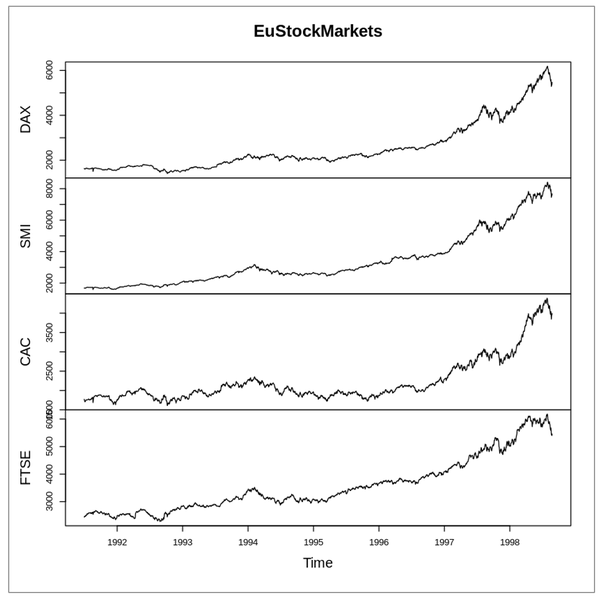

* 기본적으로 시계열을 파악할 때 활용되는 Plot 입니다.
* 시계열의 형태와 변화를 쉽게 포착할 수 있습니다.

### 히스토그램(Histogram)
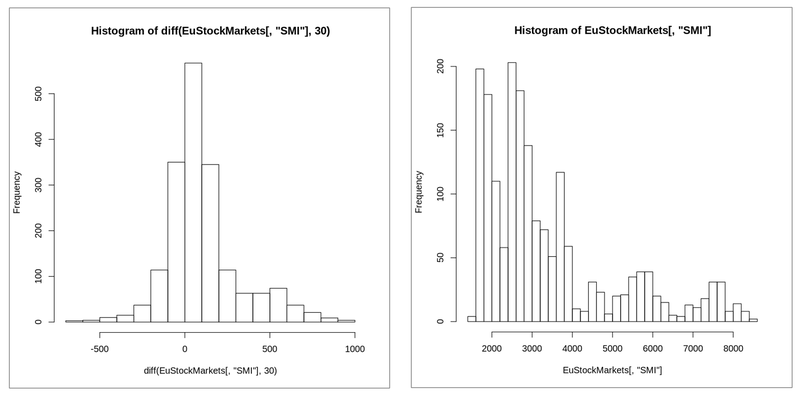

* 데이터의 분포를 판단할 때 사용합니다.
* 일반적으로 시계열 데이터는 1차 차분(변화량)에 대해 히스토그램을 그리면 특정한 분포를 볼 수 있습니다.

### 산점도(Scatter plot)
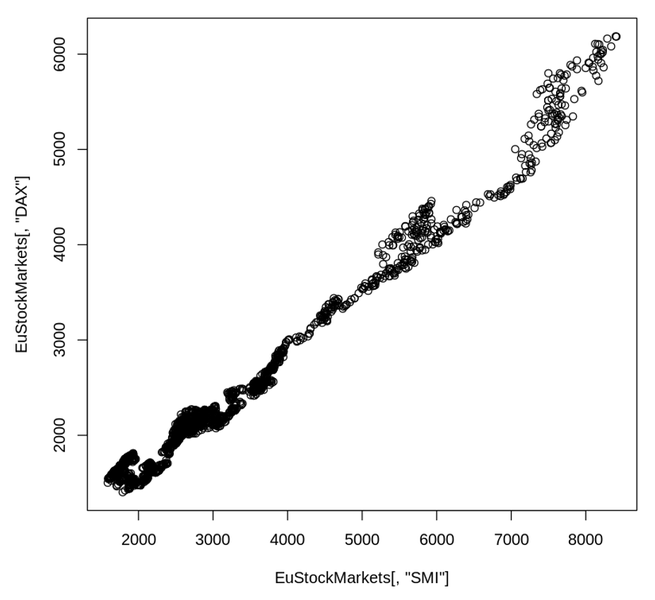

* 산점도의 경우 두 시계열의 관계에 대한 유의미한 정보를 확인할 수 있습니다.
* 이 경우에도 데이터를 차분함으로써 새로운 의미를 찾아볼 수 있습니다.

### 원형 차트(Circular Chart)
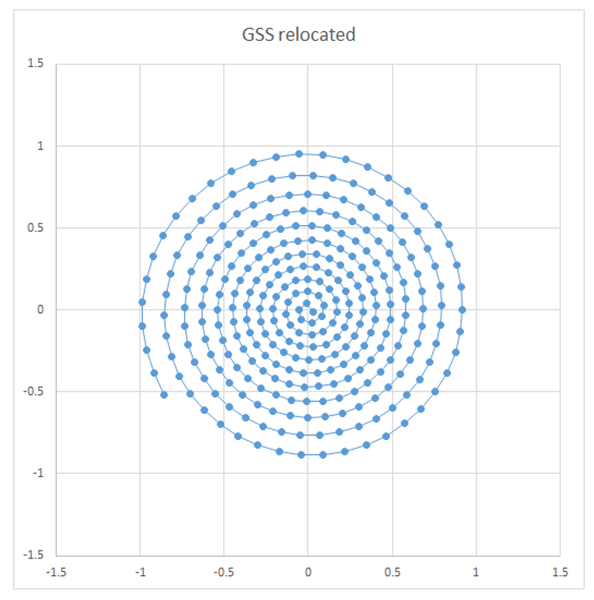

* 시계열에 대한 유의미한 인사이트를 얻기는 어려우나, 시각적 효과를 위해서 많이 사용합니다.
* 계절성을 시각화할 땐 유용할 때도 있습니다.
> 같은 Plot도 무엇을 축으로 삼느냐에 따라 다른 의미를 추출해낼 수 있습니다.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # 시각화 라이브러리인 matplotlib을 불러옵니다.

In [5]:
# 해당 경로에 있는 EuStockMarkets의 csv파일을 불러옵니다.
eustockmarkets = pd.read_csv(r'C:\Users\nini\Desktop\TimeSeriese_Learning_training\training\data\EuStockMarkets.csv')

In [6]:
eustockmarkets.head()

,Unnamed: 0,DAX,SMI,CAC,FTSE
0,1,1628.75,1678.1,1772.8,2443.6
1,2,1613.63,1688.5,1750.5,2460.2
2,3,1606.51,1678.6,1718.0,2448.2
3,4,1621.04,1684.1,1708.1,2470.4
4,5,1618.16,1686.6,1723.1,2484.7


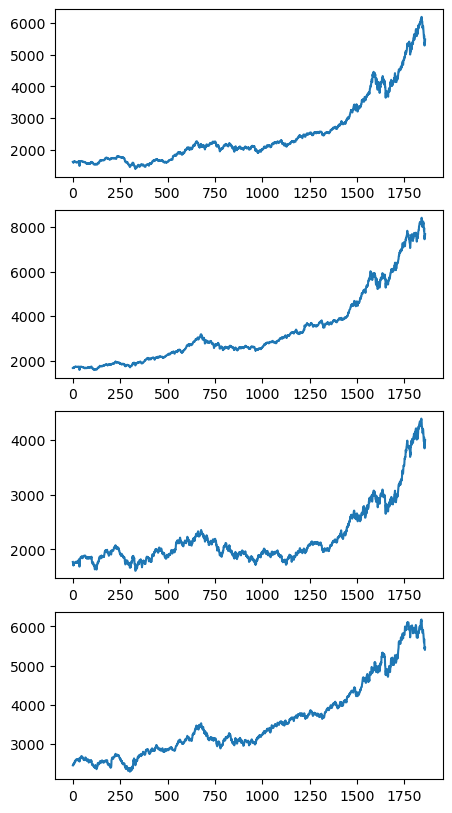

In [7]:
plt.figure(figsize = (5,10)) # 가로5, 세로10인치의 전체 figure를 생성합니다.
plt.subplot(4,1,1) # 가로4칸, 세로1칸, axis 1의 subplot을 생성합니다.
plt.plot(eustockmarkets['DAX']) # EustockMarket 데이터셋에서 'DAX' columns plot을 그립니다.
plt.subplot(4,1,2)
plt.plot(eustockmarkets['SMI'])
plt.subplot(4,1,3)
plt.plot(eustockmarkets['CAC'])
plt.subplot(4,1,4)
plt.plot(eustockmarkets['FTSE'])
plt.show() # 그린 플롯을 보여줍니다.

* eustockmarkets 데이터셋에서 SMI column과 차분을 적용한 SMI column의 차이를 아래와 같이 히스토그램으로 비교하였습니다.
* 앞서 '2-3.정상성이란?' 노드에서 설명한 것처럼 평균을 일정하게 하고 정상성(stationarity)을 가지게 만들 수 있습니다. 
* 시각적으로도 가운데로 밀집한 형태의 히스토그램으로 변경되었음을 알 수 있습니다.

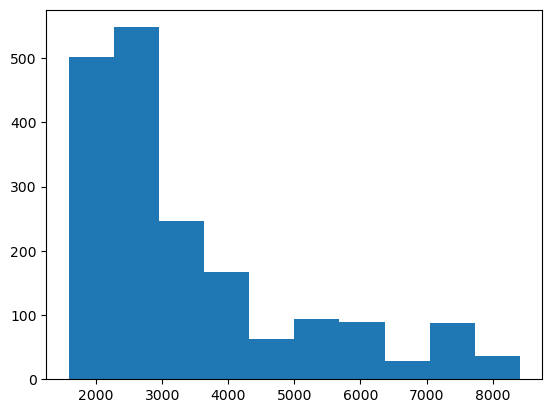

In [8]:
# DAX columns 히스토그램 생성 
plt.hist(eustockmarkets['SMI'])
plt.show()

In [9]:
print(eustockmarkets['SMI'])
print('--' * 20)

diff = eustockmarkets['SMI'].diff() # 각 인덱스의 요소끼리의 차이를 계산합니다.
print(diff) # 바로 위에 출력된 값과 diff 변수에서 나온 출력값의 차이를 비교해보세요.

0       1678.1
1       1688.5
2       1678.6
3       1684.1
4       1686.6
         ...  
1855    7721.3
1856    7447.9
1857    7607.5
1858    7552.6
1859    7676.3
Name: SMI, Length: 1860, dtype: float64
----------------------------------------
0         NaN
1        10.4
2        -9.9
3         5.5
4         2.5
        ...  
1855   -231.6
1856   -273.4
1857    159.6
1858    -54.9
1859    123.7
Name: SMI, Length: 1860, dtype: float64


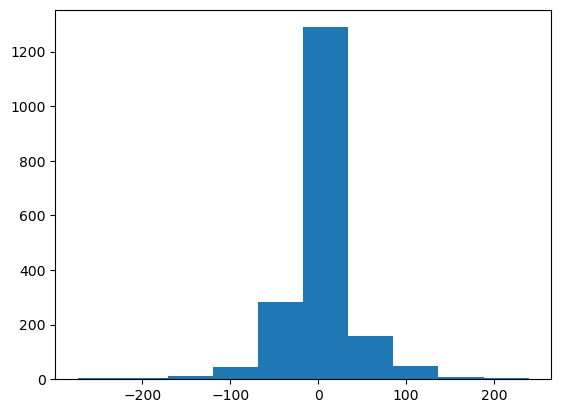

In [10]:
# 차분이 적용된 DAX 히스토그램 생성 
plt.hist(diff)
plt.show()

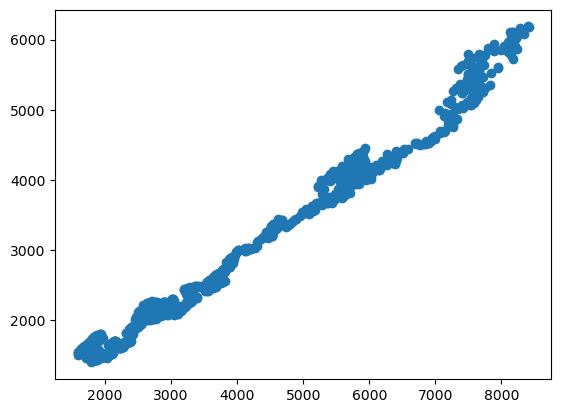

In [11]:
# SMI와 DAX를 비교한 산점도
plt.scatter(eustockmarkets['SMI'], eustockmarkets['DAX'])
plt.show()

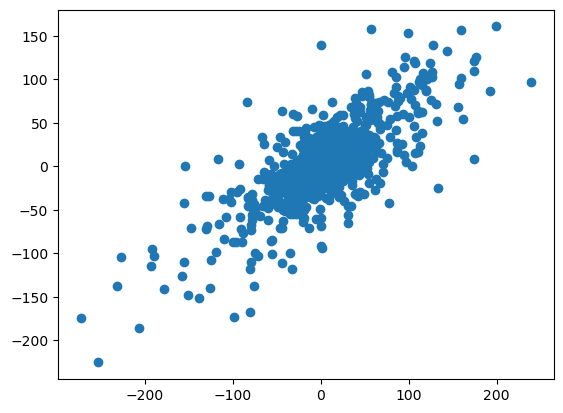

In [12]:
# 차분이 적용된 SMI와 DAX를 비교한 산점도
plt.scatter(eustockmarkets['SMI'].diff(), eustockmarkets['DAX'].diff())
plt.show()

# 3. 시계열에 특화된 EDA 방법
1. ACF(AutoCorrelation Function) Plot
    * 자기 상관 함수는 시간에 따른 상관 정도를 나타내기 위해 사용하는 통계량을 나타냅니다.
2. PACF(Partial AutoCorrelation Function) Plot
    * 편자기 상관 함수는 두 시점 사이의 상관관계를 보려고 하는 경우 시점의 영향을 주는 요소들을 제외한 상관관계를 볼때 사용합니다.
3. 시계열 데이터 EDA
    * 사인함수를 ACF와 PACF에 적용하였을 때 변화를 확인할 수 있습니다.
4. Non-stationary 데이터의 ACF 및 PACF
    * 사인함수가 아닌 1~100까지 선형적으로만 증가하는 값을 적용하였기 때문에 별다른 변화를 확인할 수 없습니다.

### ACF(AutoCorrelation Function) Plot
자기 상관: 시계열 데이터에서 일정 간격이 있는 값들 사이의 상관관계를 의미합니다.

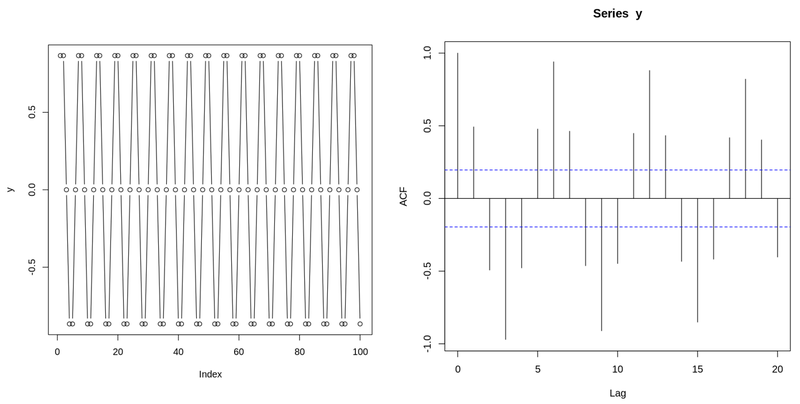
* 사인함수(왼쪽)와 사인함수의 ACF Plot(오른쪽)
* 임계값이 파란색으로 나타나있습니다.

### PACF(Partial AutoCorrelation Function) Plot
편자기상관: 자신에 대한 그 시차의 편상관을 의미합니다.
> 두 시점사이의 전체 상관관계에서 그 사이 다른 시점의 조건부 상관관계를 뺀 것입니다.
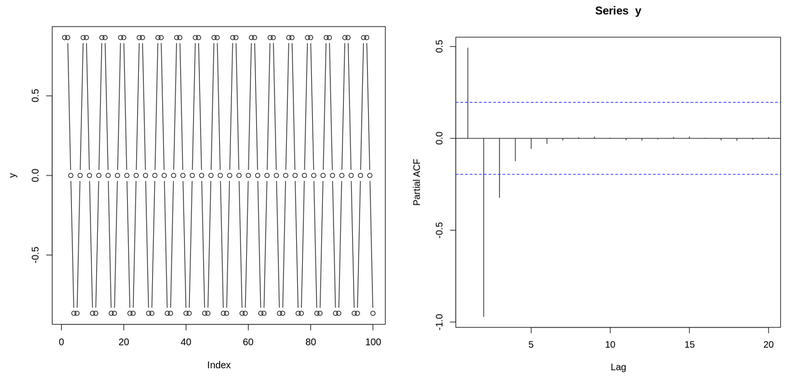
* 사인함수(왼쪽)와 사인함수의 PACF Plot(오른쪽)
* ACF에서 불필요한 중복 관계가 제거된 것을 볼 수 있습니다.

### ACF와 PACF의 의미적 차이
ACF의 경우 두 시점간의 상관관계를 계산할 때 두 시점 사이의 모든 lag에 대한 정보가 들어갑니다.    
PACF는 오로지 두 시점만의 상관관계만을 계산합니다. (다른 lag는 조건부 상관관계로 제거)

### 시계열 데이터 EDA
직접 사인함수를 만들고 ACF와 PACF에 적용하여 시각화된 결과를 확인해봅시다.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # statsmodels은 통계 모델 추정, 통계 결과, 통계 데이터 탐색을 지원하는 python 모듈입니다.

In [14]:
x = np.array(range(100)) # 0~99까지 생성
y = np.sin(x + np.pi/3) # X에 0부터 99까지 할당하고, 이를 numpy.sin에 통과시키면 사인 함수 값이 도출됩니다.

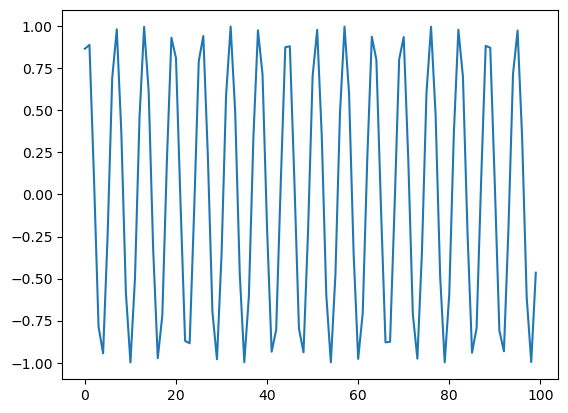

In [15]:
plt.plot(y)
plt.show()

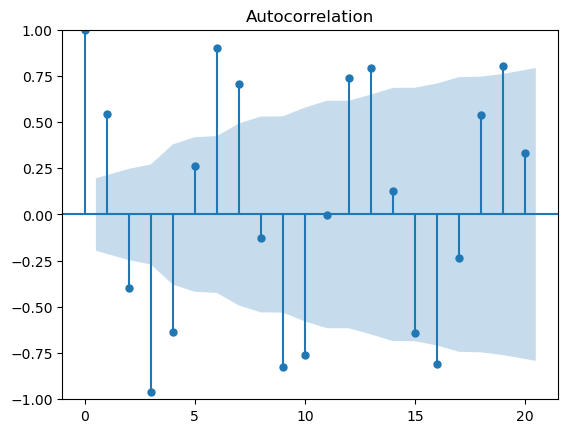

In [16]:
plot_acf(y)
plt.show()

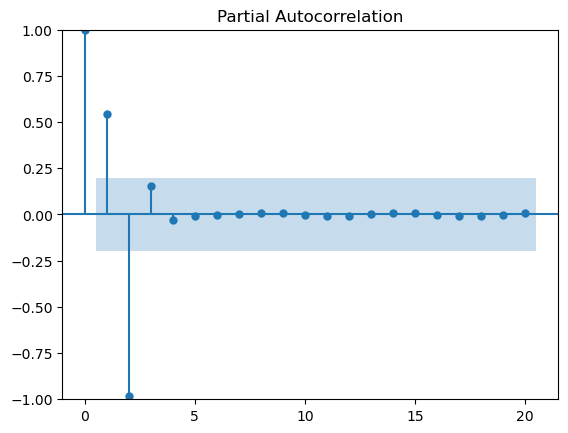

In [17]:
plot_pacf(y)
plt.show()

### Non-stationary 데이터의 ACF 및 PACF
1부터 100까지 선형적으로 증가하는 데이터의 ACF plot과 PACF plot입니다.
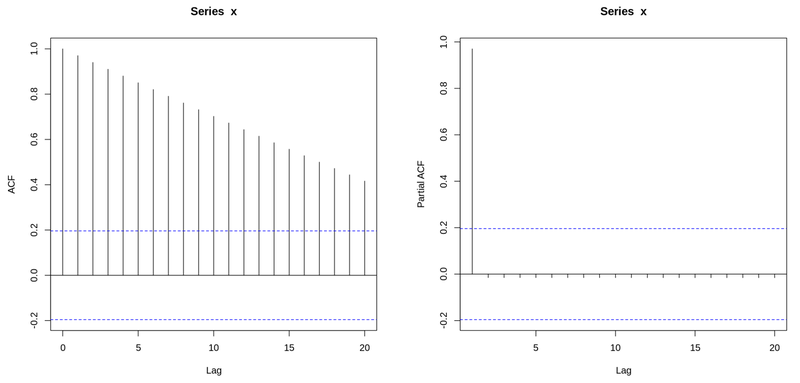

* 크게 유의미한 정보를 보여주지 못합니다.
* 값들은 단순히 균등하게 증가하는 것이기 때문에, PACF와 ACF로부터도 크게 유용한 정보를 얻을 수 없습니다.

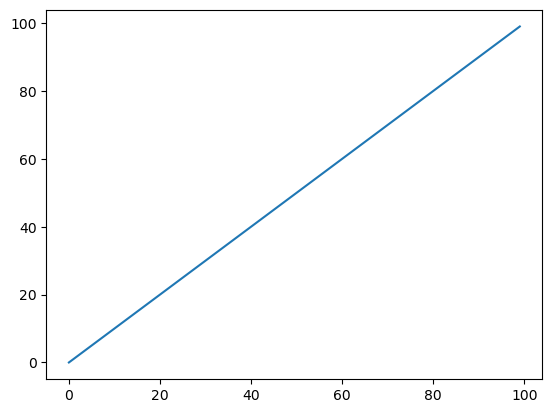

In [19]:
plt.plot(x) 
plt.show()

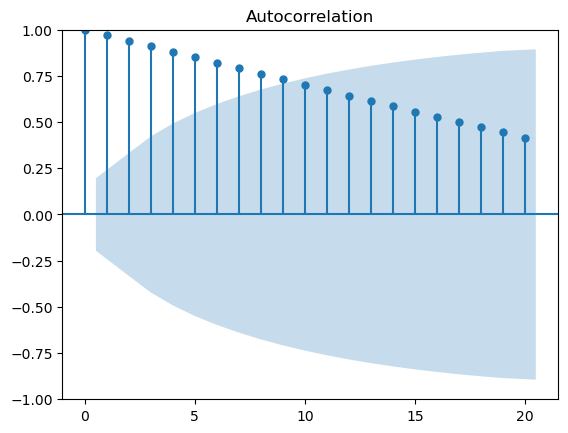

In [20]:
plot_acf(x) 
plt.show()

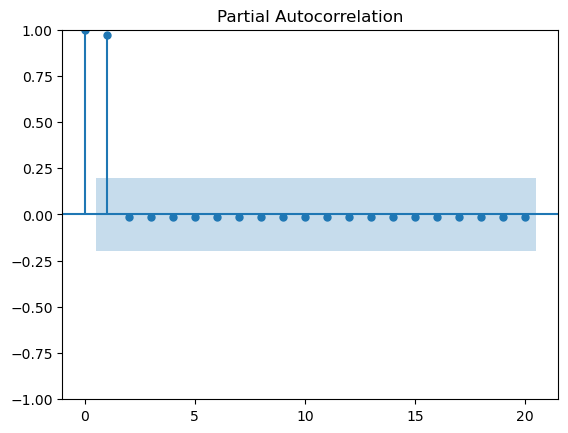

In [21]:
plot_pacf(x)
plt.show()

> 시계열 EDA에서 체크해야할 가장 중요한 위험은 ‘허위 상관’ (spurious correlation)이며 이것은 두 개 이상의 변수가 통계적 상관은 있지만 인과관계가 없는 관계를 말합니다.

# 4. 마무리하며

## 이번 시간 정리
1. 들어가며
* 시계열 데이터 EDA에서 시각화를 통해 어떻게 시계열에 대한 인사이트를 얻을 수 있을지, 특화된 시각화 방법을 생각해 봅시다.
---
2. 시각화를 통한 시계열 데이터 탐색
* Line plot : 기본적으로 시계열을 파악할 때 활용되며 시계열의 형태와 변화를 쉽게 포착할 수 있습니다.
* Histogram : 데이터의 분포를 판단할 때 사용하며 일반적으로 1차 차분(변화량)에 대해 히스토그램을 그리면 특정한 분포를 볼 수 있습니다.
* Scatter plot : 산점도의 경우 두 시계열 관계에 대한 유의미한 정보를 확인할 수 있습니다.
* Circular chart : 시계열에 대한 유의미한 인사이트를 얻기는 어려우나 시각적 효과를 위해 많이 사용하며 계절성을 시각화할 땐 유용할 때도 있습니다.
---
3. 시계열에 특화된 EDA 방법
* ACF plot : 두 시점간의 상관관계를 계산할 때 두 시점 사이의 모든 lag에 대한 정보가 들어갑니다.
* PACF plot : 오로지 두 시점만의 상관관계만을 계산합니다. (다른 lag는 조건부 상관관계로 제거)